In [ ]:
import tensorflow
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
classes = ['airplane','automobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']



In [ ]:
# y_train_pd = pd.DataFrame(y_train)
# y_train_pd.head()


'truck'

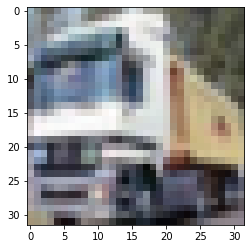

In [ ]:
plt.imshow(x_train[1])
classes[y_train[1][0]]





'automobile'

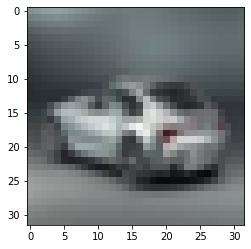

In [ ]:
plt.imshow(x_train[250])
classes[y_train[250][0]]



'frog'

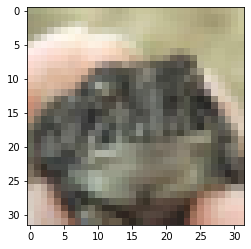

In [ ]:
plt.imshow(x_train[25])
classes[y_train[25][0]]



In [ ]:
X_train, X_test = x_train/255, x_test/255

In [ ]:
model = Sequential()

model.add(Conv2D(72, 4, activation = "relu", kernel_initializer= 'he_uniform',))
model.add(MaxPool2D())

model.add(Conv2D(144, 4, activation = "relu", kernel_initializer= 'he_uniform',))
model.add(MaxPool2D())

model.add(Conv2D(288, 4, activation = "relu", kernel_initializer= 'he_uniform',))
model.add(MaxPool2D())

model.add(Flatten())



In [ ]:
model.add(Dense(144, activation = "relu", kernel_initializer='he_uniform'))
model.add(Dense(72, activation = "relu", kernel_initializer='he_uniform'))
model.add(Dense(36, activation = "sigmoid"))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer="SGD", loss = tensorflow.keras.losses.sparse_categorical_crossentropy, metrics= ['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=15, batch_size = 40, validation_split = 0.1)

Epoch 1/15
1125/1125 [==============================] - 26s 20ms/step - loss: 2.0750 - accuracy: 0.2410 - val_loss: 1.8823 - val_accuracy: 0.3320
Epoch 2/15
1125/1125 [==============================] - 17s 15ms/step - loss: 1.7913 - accuracy: 0.3598 - val_loss: 1.6740 - val_accuracy: 0.3908
Epoch 3/15
1125/1125 [==============================] - 15s 14ms/step - loss: 1.6259 - accuracy: 0.4194 - val_loss: 1.5327 - val_accuracy: 0.4452
Epoch 4/15
1125/1125 [==============================] - 15s 14ms/step - loss: 1.5100 - accuracy: 0.4630 - val_loss: 1.4392 - val_accuracy: 0.4936
Epoch 5/15
1125/1125 [==============================] - 16s 14ms/step - loss: 1.4132 - accuracy: 0.4972 - val_loss: 1.3496 - val_accuracy: 0.5214
Epoch 6/15
1125/1125 [==============================] - 16s 14ms/step - loss: 1.3325 - accuracy: 0.5262 - val_loss: 1.3371 - val_accuracy: 0.5224
Epoch 7/15
1125/1125 [==============================] - 15s 14ms/step - loss: 1.2612 - accuracy: 0.5556 - val_loss: 1.2717 -

In [ ]:
Y_Pred = model.predict(x_test).argmax(axis=1)

Y_Pred.shape

(10000,)

In [ ]:
print(f'Accuracy is : {accuracy_score(Y_Pred, y_test)}')
print(f'F1 Score is : {f1_score(y_test, Y_Pred, average= "weighted")}.')
print(f'Precision is : {precision_score(y_test, Y_Pred, average="weighted")}.')
print(f'Recall is : {recall_score(y_test, Y_Pred, average = "weighted")}.')


Accuracy is : 0.4625
F1 Score is : 0.4171031489365968.
Precision is : 0.5701060384964839.
Recall is : 0.4625.


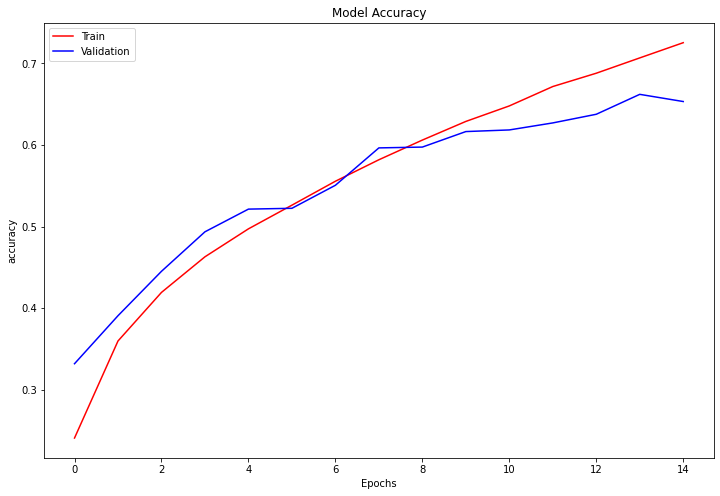

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(history.history['accuracy'], color = 'red', label = 'Train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'Validation')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.title('Model Accuracy')
plt.legend()
plt.show()

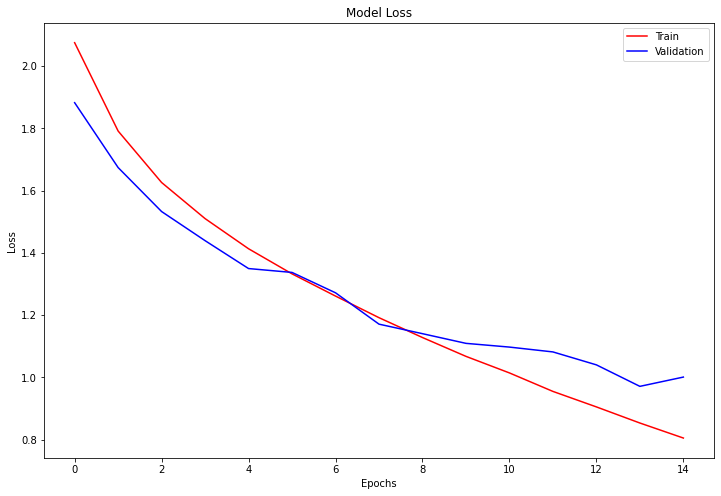

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(history.history['loss'], color = 'red', label = 'Train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'Validation')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Model Loss')
plt.legend()
plt.show()


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  3528      
                                                                 
 max_pooling2d (MaxPooling2D  (40, 14, 14, 72)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (40, 11, 11, 144)         166032    
                                                                 
 max_pooling2d_1 (MaxPooling  (40, 5, 5, 144)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (40, 2, 2, 288)           663840    
                                                                 
 max_pooling2d_2 (MaxPooling  (40, 1, 1, 288)          0

In [ ]:
model.save(r'C:\Users\Vikas\Documents\Computer Learning\Data Science and AI Machine Learning\Hands On projects\Deep Learning\Cifar10\cifar10_67.h5')